<h2> IMPORT STATEMENTS </h2>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

<h2> DATA UNDERSTANDING </h2>

In [15]:
data = pd.read_csv('dm1_dataset_2425_imdb/train.csv',  skipinitialspace=True)

In [16]:
data.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,\N,\N,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,\N,\N,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,\N,\N,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,\N,\N,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020,80,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


In [17]:
df = data.copy() 

In [18]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'worstRating', 'bestRating', 'totalImages',
       'totalVideos', 'totalCredits', 'criticReviewsTotal', 'titleType',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isRatable',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount',
       'countryOfOrigin', 'genres'],
      dtype='object')

In [19]:
print("-------------------------- SHAPE -----------------------")
print(df.shape, f"-> {df.shape[0]} records and {df.shape[1]} features")
print("-------------------------- INFO ------------------------")
print(df.info())

-------------------------- SHAPE -----------------------
(16431, 23) -> 16431 records and 23 features
-------------------------- INFO ------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16431 entries, 0 to 16430
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                16431 non-null  object 
 1   rating                       16431 non-null  object 
 2   startYear                    16431 non-null  int64  
 3   endYear                      16431 non-null  object 
 4   runtimeMinutes               16431 non-null  object 
 5   awardWins                    13813 non-null  float64
 6   numVotes                     16431 non-null  int64  
 7   worstRating                  16431 non-null  int64  
 8   bestRating                   16431 non-null  int64  
 9   totalImages                  16431 non-null  int64  
 10  totalVideos                  16

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
startYear,16431.0,1991.867081,26.120690,1878.0,1978.0,1997.0,2013.0,2024.0
awardWins,13813.0,0.491855,2.974264,0.0,0.0,0.0,0.0,145.0
numVotes,16431.0,1492.153551,20137.708096,5.0,15.0,36.0,148.5,966565.0
worstRating,16431.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
bestRating,16431.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0
totalImages,16431.0,11.477025,74.254261,0.0,1.0,1.0,6.0,3504.0
totalVideos,16431.0,0.271499,3.115448,0.0,0.0,0.0,0.0,258.0
totalCredits,16431.0,61.341976,174.017450,0.0,16.0,34.0,65.0,15742.0
criticReviewsTotal,16431.0,2.785527,15.411389,0.0,0.0,0.0,1.0,533.0
awardNominationsExcludeWins,16431.0,0.558883,3.955372,0.0,0.0,0.0,0.0,197.0


<h2> Distribuzione delle variabili </h2

In [109]:
def calculate_skewness_kurtosis(df):
    # Selezioniamo solo le colonne numeriche (int e float)
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Creiamo un dizionario per memorizzare i risultati
    results = {
        'Feature': [],
        'Skewness': [],
        'Kurtosis': []
    }
    
    # Calcoliamo skewness e kurtosis per ciascuna colonna numerica
    for col in numeric_columns:
        results['Feature'].append(col)
        results['Skewness'].append(skew(df[col], nan_policy='omit'))  # Ignoriamo i NaN
        results['Kurtosis'].append(kurtosis(df[col], nan_policy='omit'))  # Ignoriamo i NaN
    
    # Convertiamo i risultati in un DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# Esempio di utilizzo
# Assumiamo che tu abbia un DataFrame chiamato 'df'
# df = pd.read_csv('path_to_your_file.csv')
results = calculate_skewness_kurtosis(df)

# Mostriamo i risultati
print(results)

                        Feature   Skewness     Kurtosis
0                     startYear  -1.137049     1.092041
1                     awardWins  20.890671   697.616863
2                      numVotes  28.518758   995.793813
3                   worstRating        NaN          NaN
4                    bestRating        NaN          NaN
5                   totalImages  28.750900  1075.086500
6                   totalVideos  48.269849  3299.066837
7                  totalCredits  50.448594  4131.618176
8            criticReviewsTotal  14.776187   308.553808
9   awardNominationsExcludeWins  22.067634   710.518790
10                      isAdult   5.966325    33.597039
11                   numRegions   4.181723    22.529674
12             userReviewsTotal  46.308058  3464.081482
13                  ratingCount  28.518375   995.797956


/var/folders/cq/nf_k2ymx2j15b3kqy1qp9zbw0000gn/T/ipykernel_14373/193682240.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results['Skewness'].append(skew(df[col], nan_policy='omit'))  # Ignoriamo i NaN
/var/folders/cq/nf_k2ymx2j15b3kqy1qp9zbw0000gn/T/ipykernel_14373/193682240.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results['Kurtosis'].append(kurtosis(df[col], nan_policy='omit'))  # Ignoriamo i NaN


1. startYear
Skewness = -1.137: La distribuzione è asimmetrica verso sinistra. In altre parole, ci sono più titoli concentrati negli anni più recenti, con una lunga coda verso gli anni più vecchi.
Kurtosis = 1.092: La distribuzione ha code più leggere rispetto a una distribuzione normale. Quindi, la maggior parte dei titoli si trova in un intervallo ristretto di anni, senza grandi picchi in entrambi i "lati" della distribuzione.
2. awardWins
Skewness = 20.891: Un valore di skewness così elevato indica una distribuzione fortemente asimmetrica verso destra. Probabilmente, la maggior parte dei titoli ha un numero di premi vinti molto basso, ma ci sono alcuni titoli con un numero estremamente alto di premi vinti.
Kurtosis = 697.617: Un valore molto elevato di kurtosi suggerisce che la distribuzione ha code estremamente pesanti, con un numero molto ridotto di titoli che hanno vinto un numero eccezionalmente alto di premi. Questi pochi titoli con molte vittorie tendono a distorcere notevolmente la distribuzione.
3. numVotes
Skewness = 28.519: La distribuzione è fortemente asimmetrica verso destra. La maggior parte dei titoli ha un numero relativamente basso di voti, ma ci sono pochi titoli con un numero eccezionalmente alto di voti.
Kurtosis = 995.794: Un valore molto elevato di kurtosi, che indica code molto pesanti. I titoli più votati hanno un numero molto superiore rispetto alla maggior parte degli altri, creando una distribuzione con picchi estremi.
4. worstRating
Skewness = NaN, Kurtosis = NaN: Il valore NaN potrebbe indicare che la variabile contiene molti valori mancanti (NaN) o valori costanti (ad esempio, la colonna potrebbe essere vuota o avere lo stesso valore per tutte le righe).
5. bestRating
Skewness = NaN, Kurtosis = NaN: Come per worstRating, i valori NaN suggeriscono che la variabile contiene dati mancanti o costanti.
6. totalImages
Skewness = 28.751: La distribuzione è fortemente asimmetrica verso destra, con una grande concentrazione di titoli con un numero relativamente basso di immagini, ma pochi titoli con un numero molto alto di immagini.
Kurtosis = 1075.087: Le code della distribuzione sono molto pesanti, indicando che esistono pochi titoli con un numero eccezionalmente alto di immagini. La maggior parte dei titoli ha un numero di immagini molto inferiore rispetto a questi pochi estremi.
7. totalVideos
Skewness = 48.270: La distribuzione è estremamente asimmetrica verso destra. La maggior parte dei titoli ha pochi video associati, ma ci sono pochi titoli con un numero eccezionalmente elevato di video.
Kurtosis = 3299.067: Le code della distribuzione sono molto pesanti, indicando che ci sono pochi titoli con un numero estremamente alto di video. La distribuzione è estremamente concentrata in un piccolo numero di valori bassi, con alcuni estremi molto alti.
8. totalCredits
Skewness = 50.449: Un altro caso di forte asimmetria verso destra. La maggior parte dei titoli ha un numero relativamente basso di crediti, ma alcuni hanno un numero molto elevato.
Kurtosis = 4131.618: Le code sono molto pesanti, indicando che esistono alcuni titoli con crediti eccezionalmente alti rispetto alla maggior parte degli altri.
9. criticReviewsTotal
Skewness = 14.776: La distribuzione è asimmetrica verso destra, con la maggior parte dei titoli che ha poche recensioni dei critici, ma alcuni titoli hanno un numero molto elevato di recensioni.
Kurtosis = 308.554: La distribuzione ha code pesanti, indicando che ci sono alcuni titoli con un numero molto alto di recensioni, ma la maggior parte dei titoli ha recensioni in un intervallo più limitato.
10. awardNominationsExcludeWins
Skewness = 22.068: La distribuzione è asimmetrica verso destra, con molti titoli che hanno pochi riconoscimenti esclusi i premi, ma pochi titoli con un numero molto elevato.
Kurtosis = 710.519: Le code della distribuzione sono molto pesanti, suggerendo che ci sono pochi titoli con un numero molto alto di nomine.
11. isAdult
Skewness = 5.966: La distribuzione è asimmetrica verso destra, con molti titoli che non sono adulti e pochi titoli etichettati come adulti.
Kurtosis = 33.597: La distribuzione ha code più pesanti, probabilmente perché ci sono pochi titoli che appartengono alla categoria "adulto", il che potrebbe riflettersi in una distribuzione con un picco netto su uno dei due valori (ad esempio, 0 per non adulti e 1 per adulti).
12. numRegions
Skewness = 4.182: La distribuzione è asimmetrica verso destra, con la maggior parte dei titoli che si trovano in poche regioni, ma alcuni titoli hanno molte regioni.
Kurtosis = 22.530: La distribuzione ha code più pesanti, indicando che ci sono titoli con un numero significativamente più alto di regioni rispetto alla maggior parte degli altri.
13. userReviewsTotal
Skewness = 46.308: La distribuzione è fortemente asimmetrica verso destra, con un numero molto elevato di recensioni per pochi titoli, ma la maggior parte ha un numero di recensioni molto basso.
Kurtosis = 3464.081: Le code sono estremamente pesanti, suggerendo che ci sono pochi titoli con un numero eccezionalmente alto di recensioni degli utenti.
14. ratingCount
Skewness = 28.518: La distribuzione è asimmetrica verso destra. La maggior parte dei titoli ha pochi voti, ma ci sono pochi titoli con un numero molto elevato di voti.
Kurtosis = 995.798: Le code della distribuzione sono molto pesanti, indicando che ci sono titoli con un numero eccezionalmente alto di voti rispetto alla maggior parte degli altri.

/var/folders/cq/nf_k2ymx2j15b3kqy1qp9zbw0000gn/T/ipykernel_14373/3334503349.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Blues_d")


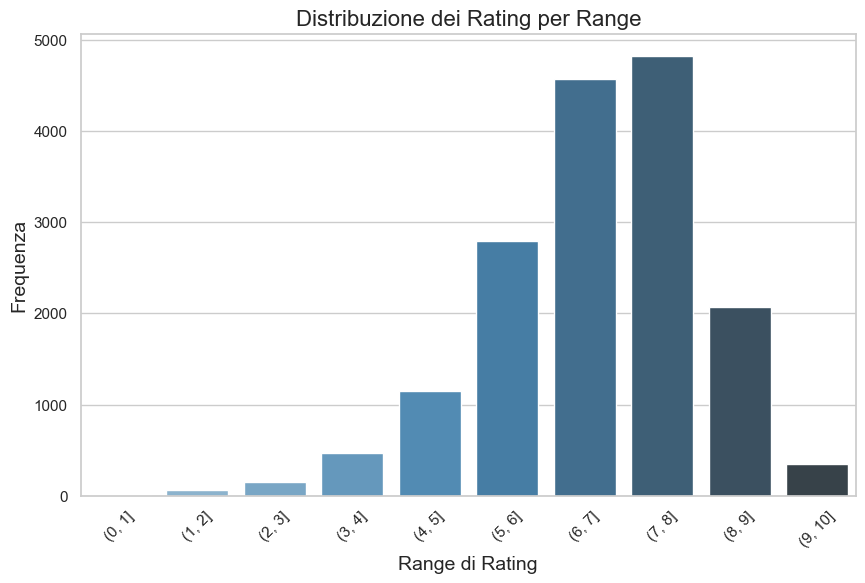

Skewness della distribuzione: 0.79
Kurtosis della distribuzione: -0.90


In [110]:
# 1. Conta la frequenza di ciascun range di rating (senza splittare)
rating_counts = df['rating'].value_counts().sort_index()

# 2. Visualizzare la distribuzione dei rating
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Blues_d")

# 3. Aggiungi etichette e titolo
plt.title('Distribuzione dei Rating per Range', fontsize=16)
plt.xlabel('Range di Rating', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.xticks(rotation=45)  # Ruota le etichette per una visualizzazione migliore

# Mostra il grafico
plt.show()

# 4. Calcolare Skewness e Kurtosis sulla distribuzione delle frequenze
# Calcoliamo skewness e kurtosis sulla distribuzione delle frequenze dei range
skewness = skew(rating_counts.values)
kurt = kurtosis(rating_counts.values)

# 5. Visualizzare i risultati
print(f"Skewness della distribuzione: {skewness:.2f}")
print(f"Kurtosis della distribuzione: {kurt:.2f}")

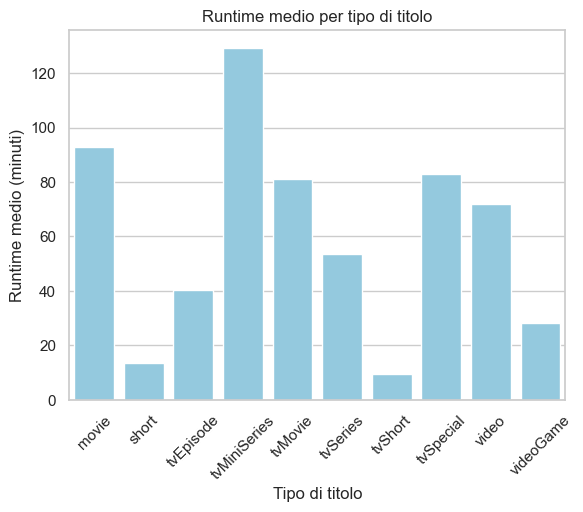

In [111]:
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')
average_runtime = df.groupby('titleType')['runtimeMinutes'].mean().reset_index()
sns.barplot(x='titleType', y='runtimeMinutes', data=average_runtime, color = 'skyblue')
plt.title('Runtime medio per tipo di titolo')
plt.xlabel('Tipo di titolo')
plt.ylabel('Runtime medio (minuti)')
plt.xticks(rotation=45)
plt.show()

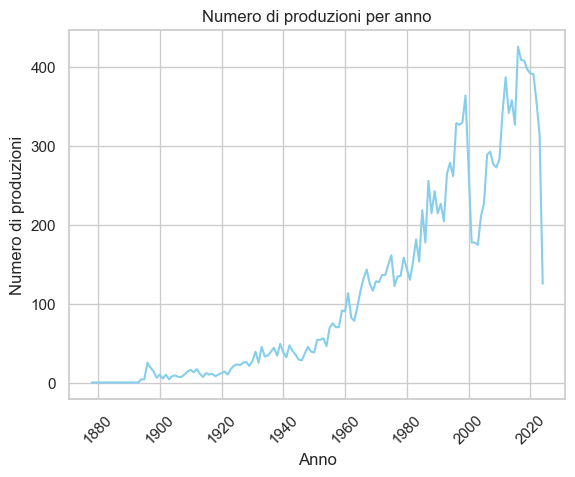

In [112]:
productions_per_year = df['startYear'].value_counts().sort_index()
sns.lineplot(x=productions_per_year.index, y=productions_per_year.values, color = 'skyblue')
plt.title('Numero di produzioni per anno')
plt.xlabel('Anno')
plt.ylabel('Numero di produzioni')
plt.xticks(rotation=45)
plt.show()

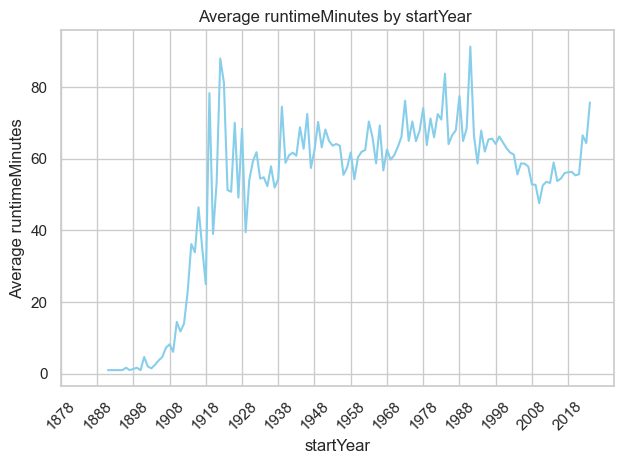

In [113]:
# Calcolare il runtime medio per anno
average_runtime_per_year = df.groupby('startYear')['runtimeMinutes'].mean().reset_index()

# Creare il grafico a linee
sns.lineplot(x='startYear', y='runtimeMinutes', data=average_runtime_per_year, color='skyblue')
plt.title('Average runtimeMinutes by startYear ')
plt.xlabel('startYear')
plt.ylabel('Average runtimeMinutes')


# Aggiungere più etichette sull'asse delle x
plt.xticks(range(1878, 2025, 10), rotation=45)  # Modifica l'intervallo e il passo secondo necessità

plt.tight_layout()
plt.savefig('distribution_of_runtimeperyears.png', dpi=300, bbox_inches='tight')
plt.show()

In [114]:
# Calcolare skewness e kurtosis ignorando NaN
skewness = skew(average_runtime_per_year['runtimeMinutes'], nan_policy='omit')
kurt = kurtosis(average_runtime_per_year['runtimeMinutes'], nan_policy='omit')

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Skewness: -1.2171355394699852
Kurtosis: 0.3453503178351922


/var/folders/cq/nf_k2ymx2j15b3kqy1qp9zbw0000gn/T/ipykernel_14373/2170455649.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  title_counts = df.groupby(['decade', 'titleType']).size().unstack(fill_value=0)


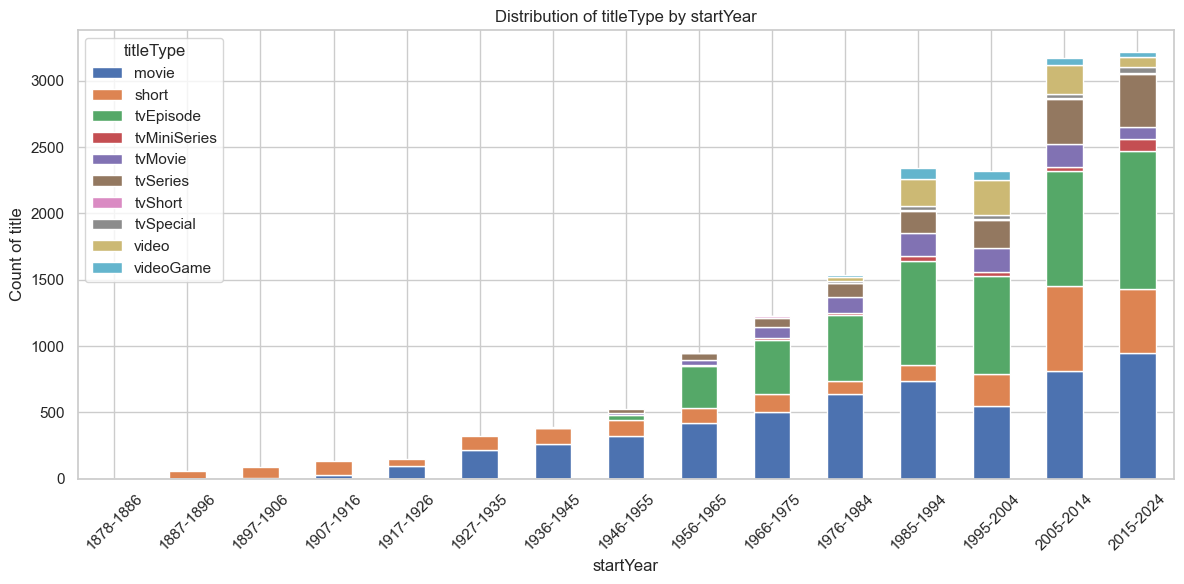

In [115]:
# Definire i bins di anni (ad esempio, decenni)
bins = np.linspace(1878, 2025, 16)  # 15 intervalli (16 valori)
labels = [f'{int(bins[i])}-{int(bins[i+1]) - 1}' for i in range(len(bins) - 1)] 

# Creare una nuova colonna per i decenni
df['decade'] = pd.cut(df['startYear'], bins=bins, labels=labels, right=False)

# Raggruppare per decennio e tipo di titolo
title_counts = df.groupby(['decade', 'titleType']).size().unstack(fill_value=0)

# Creare il grafico a barre
title_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of titleType by startYear')
plt.xlabel('startYear')
plt.ylabel('Count of title')
plt.xticks(rotation=45)
plt.legend(title='titleType')
plt.tight_layout()
plt.savefig('distribution_of_typetitleperyears.png', dpi=300, bbox_inches='tight')
plt.show()

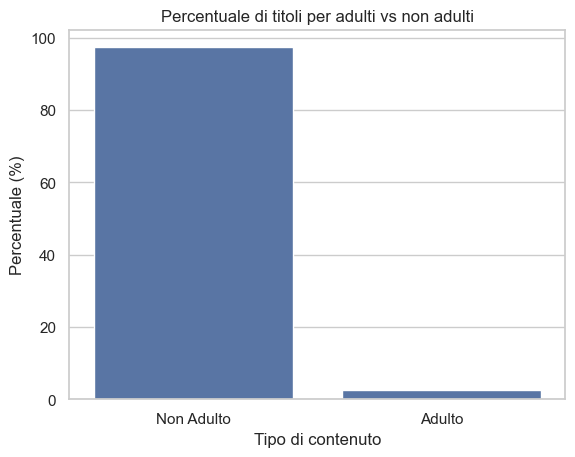

In [116]:
adult_percentage = data['isAdult'].value_counts(normalize=True) * 100
sns.barplot(x=adult_percentage.index, y=adult_percentage.values)
plt.title('Percentuale di titoli per adulti vs non adulti')
plt.xlabel('Tipo di contenuto')
plt.ylabel('Percentuale (%)')
plt.xticks(ticks=[0, 1], labels=['Non Adulto', 'Adulto'])
plt.show()

In [117]:
valore_minimo = df['startYear'].min()
valore_massimo = df['startYear'].max()

print(f'Valore più basso: {valore_minimo}')
print(f'Valore più alto: {valore_massimo}')

Valore più basso: 1878
Valore più alto: 2024


In [118]:
n = len(df['startYear'])

# Regola di Sturges
bins_sturges = int(1 + np.log2(n))

# Calcola IQR per la regola di Freedman-Diaconis
Q1 = df['startYear'].quantile(0.25)
Q3 = df['startYear'].quantile(0.75)
IQR = Q3 - Q1

# Regola di Freedman-Diaconis
bins_freedman_diaconis = int((df['startYear'].max() - df['startYear'].min()) / (2 * IQR / n**(1/3)))

print(f'Numero di bins (Sturges): {bins_sturges}')
print(f'Numero di bins (Freedman-Diaconis): {bins_freedman_diaconis}')

Numero di bins (Sturges): 15
Numero di bins (Freedman-Diaconis): 53


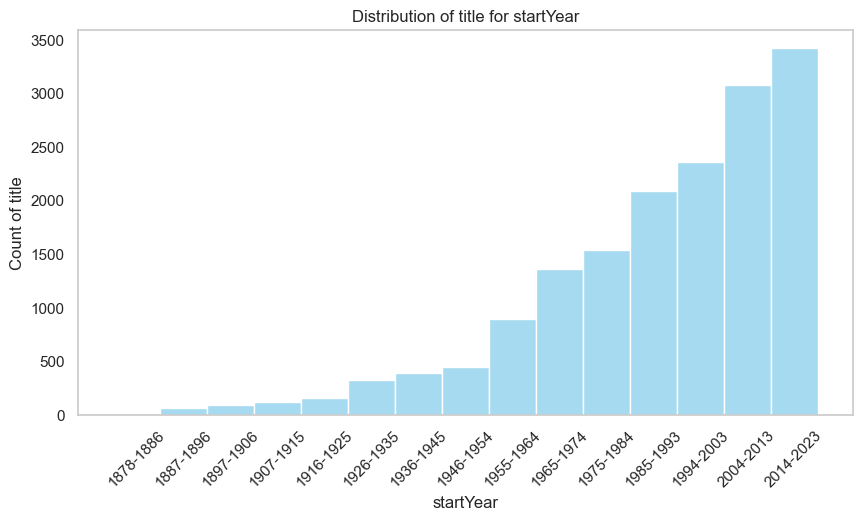

In [119]:
# Imposta lo stile di Seaborn
sns.set(style="whitegrid")

bins = np.linspace(1878, 2024, 16)  # 15 intervalli (16 valori)
labels = [f'{int(bins[i])}-{int(bins[i+1]) - 1}' for i in range(len(bins) - 1)]  # Etichette per gli intervalli
df['YearRange'] = pd.cut(df['startYear'], bins=bins, labels=labels, right=False)

# Grafico istogramma per la distribuzione per intervalli di anni
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='YearRange', discrete=True, stat='count', bins=len(labels), color='skyblue')
plt.title('Distribution of title for startYear')
plt.xlabel('startYear')
plt.ylabel('Count of title')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('distribution_of_titleperyear.png', dpi=300, bbox_inches='tight')
plt.show()

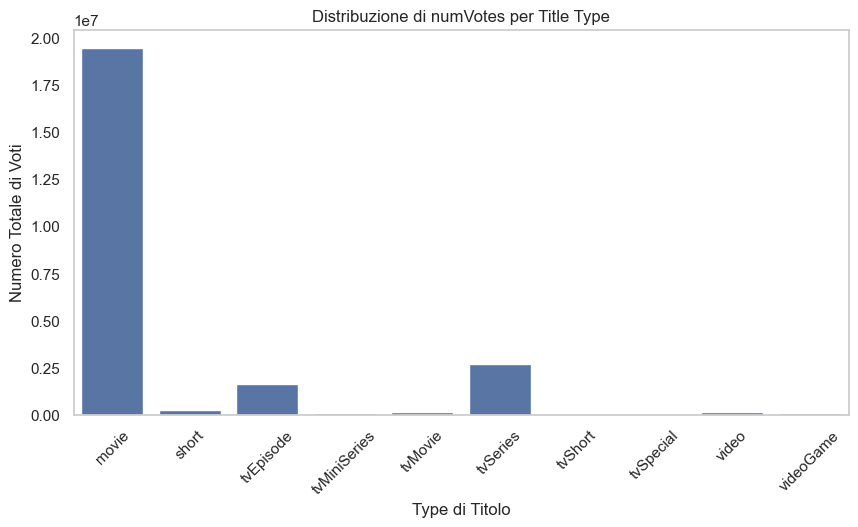

In [120]:
# Imposta lo stile di Seaborn
sns.set(style="whitegrid")

# Calcolare la somma dei voti per ciascun tipo di titolo
votes_by_title_type = df.groupby('titleType')['numVotes'].sum().reset_index()

# Grafico a barre per la distribuzione di numVotes per titleType
plt.figure(figsize=(10, 5))
sns.barplot(x='titleType', y='numVotes', data=votes_by_title_type)
plt.title('Distribuzione di numVotes per Title Type')
plt.xlabel('Type di Titolo')
plt.ylabel('Numero Totale di Voti')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


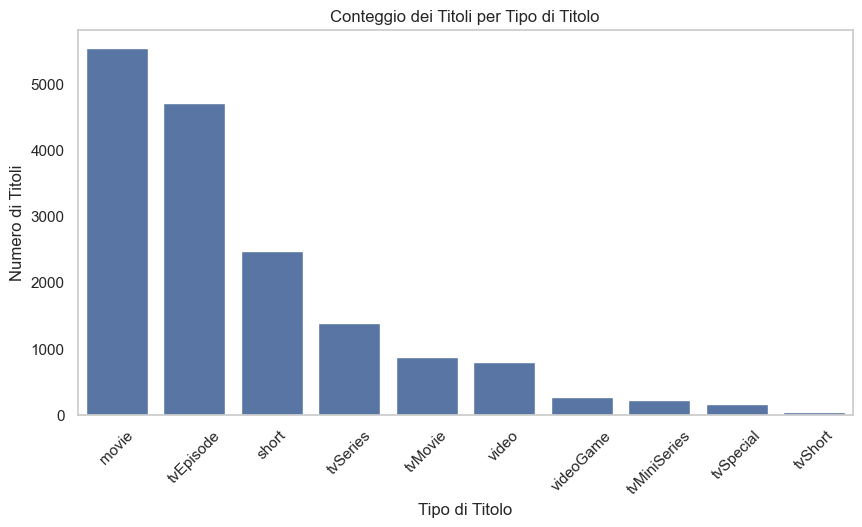

In [121]:
# Imposta lo stile di Seaborn
sns.set(style="whitegrid")

# Contare il numero di titoli per ciascun tipo di titolo
title_count_by_type = df['titleType'].value_counts().reset_index()
title_count_by_type.columns = ['titleType', 'titleCount']  # Rinomina le colonne

# Grafico a barre per la distribuzione dei titoli per titleType
plt.figure(figsize=(10, 5))
sns.barplot(x='titleType', y='titleCount', data=title_count_by_type)
plt.title('Conteggio dei Titoli per Tipo di Titolo')
plt.xlabel('Tipo di Titolo')
plt.ylabel('Numero di Titoli')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<h2> Valori NaN</h2>

In [21]:
df.replace('\\N', np.nan, inplace=True)

In [22]:
df.replace("", np.nan, inplace=True)

In [23]:
df.isnull().any()

originalTitle                  False
rating                         False
startYear                      False
endYear                         True
runtimeMinutes                  True
awardWins                       True
numVotes                       False
worstRating                    False
bestRating                     False
totalImages                    False
totalVideos                    False
totalCredits                   False
criticReviewsTotal             False
titleType                      False
awardNominationsExcludeWins    False
canHaveEpisodes                False
isRatable                      False
isAdult                        False
numRegions                     False
userReviewsTotal               False
ratingCount                    False
countryOfOrigin                False
genres                          True
dtype: bool

In [24]:
print(df.isnull().sum())

originalTitle                      0
rating                             0
startYear                          0
endYear                        15617
runtimeMinutes                  4852
awardWins                       2618
numVotes                           0
worstRating                        0
bestRating                         0
totalImages                        0
totalVideos                        0
totalCredits                       0
criticReviewsTotal                 0
titleType                          0
awardNominationsExcludeWins        0
canHaveEpisodes                    0
isRatable                          0
isAdult                            0
numRegions                         0
userReviewsTotal                   0
ratingCount                        0
countryOfOrigin                    0
genres                           382
dtype: int64


In [25]:
mode_genre = df['genres'].mode()[0]
df['genres'] = df['genres'].fillna(mode_genre)

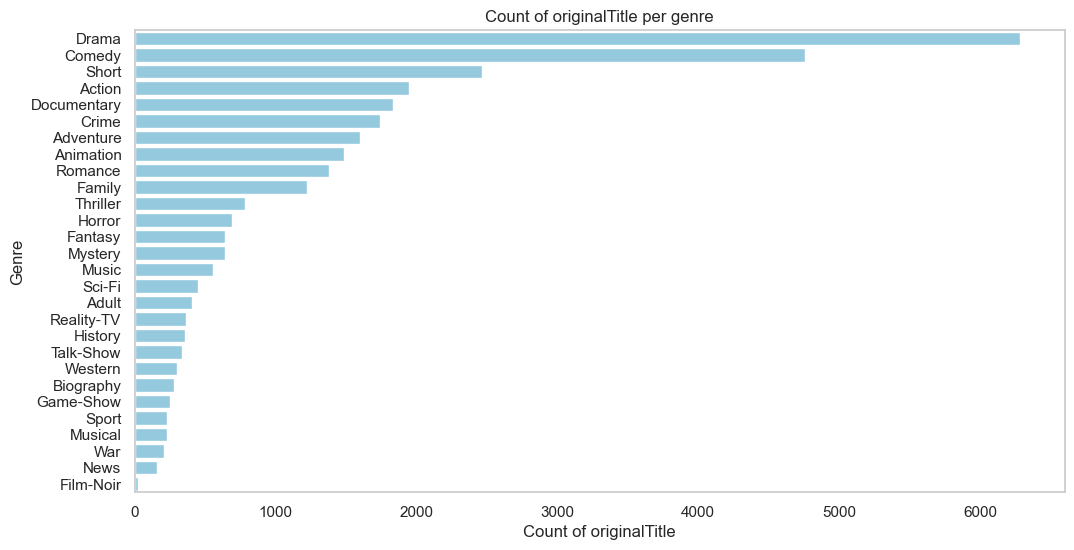

In [13]:
# Converti i valori in stringa prima di suddividerli
df['genres'] = df['genres'].str.split(',')

# Esplodi i generi
genres_exploded = df.explode('genres')

# Contare il numero di film per genere
genre_counts = genres_exploded['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'FilmCount']  # Rinomina le colonne

# Imposta lo stile di Seaborn
sns.set(style="whitegrid")


# Grafico a barre per il conteggio dei film per genere
plt.figure(figsize=(12, 6))
sns.barplot(x='FilmCount', y='Genre', data=genre_counts, color='skyblue' )
plt.title('Count of originalTitle per genre')
plt.xlabel('Count of originalTitle')
plt.ylabel('Genre')
plt.grid(axis='x')

plt.savefig('distribution_of_titlepergenre.png', dpi=300, bbox_inches='tight')

plt.show()


In [129]:
# Supponiamo che 'data' sia il tuo DataFrame
# Calcola il numero di valori nulli per ciascuna colonna
null_counts = data.isnull().sum()

# Calcola la percentuale di valori nulli per ciascuna colonna
percentage_null = (null_counts / data.shape[0]) * 100

# Crea un nuovo DataFrame per visualizzare queste informazioni
null_info = pd.DataFrame({
    "Column": null_counts.index,
    "Missing Values": null_counts.values,
    "Missing Percentage": percentage_null.values
})

# Filtra solo le colonne con valori nulli
missing_values_df = null_info[null_info["Missing Values"] > 0].copy()

# Definisci una funzione per formattare la percentuale
def format_percentage(percentage):
    return f'{percentage:.2f}%'

# Cambia il tipo della colonna 'Missing Percentage' in float prima di applicare la formattazione
missing_values_df['Missing Percentage'] = missing_values_df['Missing Percentage'].astype(float)

# Applica la funzione di formattazione
missing_values_df['Missing Percentage'] = missing_values_df['Missing Percentage'].apply(format_percentage)

# Stampa il risultato
print(missing_values_df)

# Salva il DataFrame in un file CSV
missing_values_df.to_csv('missing_values_report.csv', index=False)

       Column  Missing Values Missing Percentage
3     endYear           11104             95.90%
5   awardWins            1805             15.59%
22     genres             184              1.59%
23     decade             489              4.22%


Con una percentuale del 95% endYear dovrebbe essere eliminata totalmente come colonna

<Axes: >

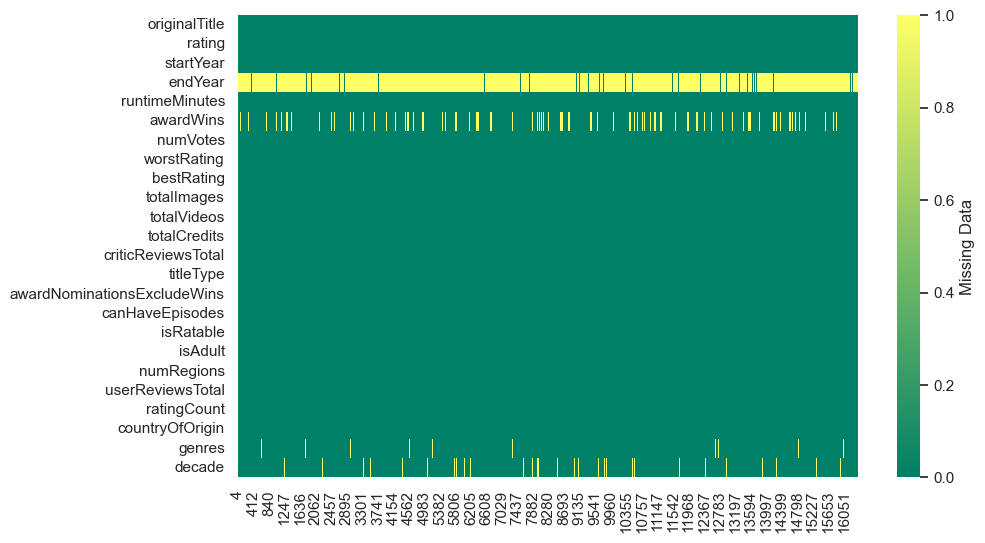

In [130]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="summer",
            cbar_kws={'label': 'Missing Data'})

<h2> OUTLIER </h2>

Di seguito i passaggi per trovare gli outlier

In [69]:
df_float = df.select_dtypes(include=['float64','int64'])

# Calcolo, primo quartile, terzo quartile e il range interquartile per ogni feature
quartiles = df_float.quantile([0.25, 0.75])
q1 = quartiles.loc[0.25]
q3 = quartiles.loc[0.75]
iqr = q3 - q1

# stabilisce un valore di soglia per l'analisi basata sulla deviazione standard. 
#Gli outlier sono definiti come valori che si trovano a più di 2 deviazioni standard dalla media.
#iqr_threshold è un moltiplicatore per l'IQR, comunemente impostato a 1.5 per identificare gli outlier.
std_dev_threshold = 2.0  
iqr_threshold = 1.5  

# Identificazione degli outlier usando la deviazione standard e il IQR-based thresholds
potential_outliers_std_dev = (df_float - df_float.mean()).abs() > std_dev_threshold * df_float.std()
potential_outliers_iqr = (df_float < q1 - iqr_threshold * iqr) | (df_float > q3 + iqr_threshold * iqr)

# Ottenere le colonne con potenziali outlier
features_with_outliers_std_dev = df_float.columns[potential_outliers_std_dev.any()]
features_with_outliers_iqr = df_float.columns[potential_outliers_iqr.any()]

# Intersezione delle colonne con outlier
common_features_all_methods = features_with_outliers_std_dev.intersection(features_with_outliers_iqr)

# stampa le features comuni
print("\nFeatures with potential outliers in all methods:")
print((common_features_all_methods).to_list())



Features with potential outliers in all methods:
['startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount']


<h2> Correlazione tra variabili </h2>
<h3> Correlazione fatta prima della pulizia dei dati </h3>

In [95]:

# Assicurati che runtimeMinutes sia di tipo numerico
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')

# Converti isAdult in formato numerico (1 per True, 0 per False)
df['isAdult'] = df['isAdult'].astype(int)

# Se ci sono colonne categoriali da convertire in numerico, gestisci anche quelle
# (Ad esempio, trasformando il numero di premi e nomination in valori numerici)
# Assicurati che le colonne siano tutte numeriche per il calcolo della correlazione

# Crea una lista di colonne numeriche
numerical_columns = [ 'numVotes', 'runtimeMinutes', 'awardWins', 'awardNominationsExcludeWins', 'isAdult']

# Calcola la correlazione tra average_rating e altre variabili
correlation_matrix = df[numerical_columns].corr()

# Stampa il risultato della matrice di correlazione
print(correlation_matrix)


                             numVotes  runtimeMinutes  awardWins  \
numVotes                     1.000000        0.069823   0.351491   
runtimeMinutes               0.069823        1.000000   0.072169   
awardWins                    0.351491        0.072169   1.000000   
awardNominationsExcludeWins  0.432749        0.070838   0.693788   
isAdult                     -0.011618        0.093912  -0.016394   

                             awardNominationsExcludeWins   isAdult  
numVotes                                        0.432749 -0.011618  
runtimeMinutes                                  0.070838  0.093912  
awardWins                                       0.693788 -0.016394  
awardNominationsExcludeWins                     1.000000 -0.016178  
isAdult                                        -0.016178  1.000000  


<h1> <b> PULIZIA DEI DATI </b> </h1>

In [6]:
data.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,\N,\N,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,\N,\N,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,\N,\N,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,\N,\N,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020,80,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


In [26]:
df_trains = data.copy() 

In [28]:
#Cancellare endYear
df_trains.drop('endYear', axis=1, inplace=True)

In [29]:
#Valori nulli, individuazione
df_trains.replace('\\N', np.nan, inplace=True)
df_trains.replace("", np.nan, inplace=True)
print(df_trains.isnull().sum())

originalTitle                     0
rating                            0
startYear                         0
runtimeMinutes                 4852
awardWins                      2618
numVotes                          0
worstRating                       0
bestRating                        0
totalImages                       0
totalVideos                       0
totalCredits                      0
criticReviewsTotal                0
titleType                         0
awardNominationsExcludeWins       0
canHaveEpisodes                   0
isRatable                         0
isAdult                           0
numRegions                        0
userReviewsTotal                  0
ratingCount                       0
countryOfOrigin                   0
genres                          382
dtype: int64


In [30]:
#Sostituzione valori nulli 
df_trains['runtimeMinutes'] = pd.to_numeric(df_trains['runtimeMinutes'], errors='coerce')

# Ora calcola la mediana della colonna 'runtimeMinutes'
median_runtime = df_trains['runtimeMinutes'].median()

# Sostituisci i valori NaN con la mediana
df_trains['runtimeMinutes'] = df_trains['runtimeMinutes'].fillna(median_runtime)

In [31]:
# Sostituire i valori NaN nella colonna 'awardWins' con 0
df_trains['awardWins'] = df_trains['awardWins'].fillna(0)

In [32]:
mode_genre = df_trains['genres'].mode()[0]
df_trains['genres'] = df_trains['genres'].fillna(mode_genre)

In [33]:
#Ricontrolliamo i valori nulli
print(df_trains.isnull().sum())

originalTitle                  0
rating                         0
startYear                      0
runtimeMinutes                 0
awardWins                      0
numVotes                       0
worstRating                    0
bestRating                     0
totalImages                    0
totalVideos                    0
totalCredits                   0
criticReviewsTotal             0
titleType                      0
awardNominationsExcludeWins    0
canHaveEpisodes                0
isRatable                      0
isAdult                        0
numRegions                     0
userReviewsTotal               0
ratingCount                    0
countryOfOrigin                0
genres                         0
dtype: int64


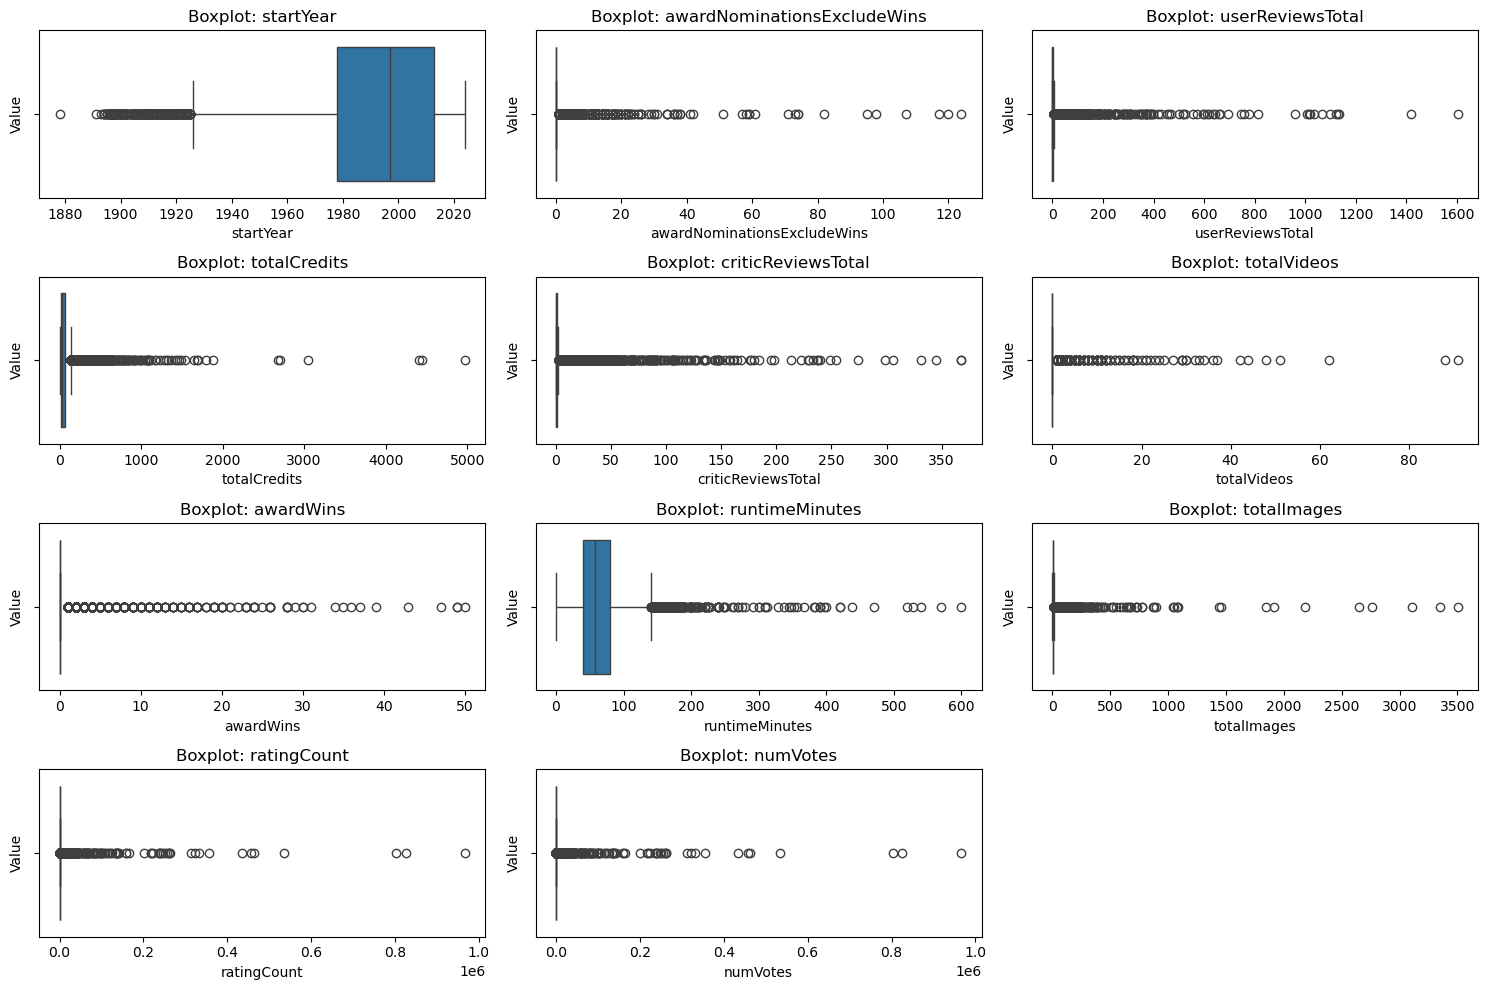

In [20]:
#boxplot con feature in cui abbiamo eliminato degli outlier
# Lista delle colonne per cui vogliamo fare il boxplot
columns = ['startYear', 'awardNominationsExcludeWins', 'userReviewsTotal', 'totalCredits', 
           'criticReviewsTotal', 'totalVideos', 'awardWins', 'runtimeMinutes', 'totalImages', 
           'ratingCount', 'numVotes']

# Numero di colonne e righe per il layout del subplot
n_cols = 3
n_rows = (len(columns) // n_cols) + (1 if len(columns) % n_cols else 0)

# Creazione della figura e degli assi per i subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Piattaforma per gli assi, appiattendo l'array se necessario
axes = axes.flatten()

# Creazione dei boxplot per ogni colonna
for i, column in enumerate(columns):
    sns.boxplot(x=df_trains[column], ax=axes[i])
    axes[i].set_title(f'Boxplot: {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')

# Se ci sono subplot vuoti (caso in cui il numero di colonne non è un multiplo di 3), nascondiamo l'asse
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Ottimizzazione della disposizione
plt.tight_layout()
plt.savefig('outlier.png', dpi=300, bbox_inches='tight')
plt.show()

In [191]:
#Eliminare gli outlier

# Filtrare i record con 'runtimeMinutes' maggiore di 190
outliers_runtime = df_trains[df_trains['runtimeMinutes'] > 999]

# Stampare i record filtrati
print(outliers_runtime)

                            originalTitle  rating  startYear  runtimeMinutes  \
1280   Jerry Lewis MDA Labor Day Telethon  (6, 7]       1966          1290.0   
13997                           Alim Dayi  (5, 6]       1991          3000.0   

       awardWins  numVotes  worstRating  bestRating  totalImages  totalVideos  \
1280         1.0       139            1          10           29            1   
13997        0.0        47            1          10            4            0   

       ...  titleType  awardNominationsExcludeWins canHaveEpisodes  isRatable  \
1280   ...   tvSeries                            2            True       True   
13997  ...   tvSeries                            0            True       True   

       isAdult  numRegions  userReviewsTotal  ratingCount  countryOfOrigin  \
1280         0           1                 1          139           ['US']   
13997        0           1                 0           47           ['TR']   

       genres  
1280     News  
1399

In [192]:
df_trains = df_trains[df_trains['runtimeMinutes'] <= 999]
#Ho cancellato le due righe con gli outlier estremi

In [193]:
# Filtrare e rimuovere le righe con 'awardWins' maggiore di 60
df_trains = df_trains[df_trains['awardWins'] <= 60]
#Ho cancellato le sei o sette righe non ricordo con valore maggiore o uguale a 60
#gli outlier estremi

In [194]:
df_trains = df_trains[~(df_trains['awardNominationsExcludeWins'] > 130)]
df_trains = df_trains[~(df_trains['userReviewsTotal'] > 2000)]
df_trains = df_trains[~(df_trains['totalCredits'] > 5000)]
df_trains = df_trains[~(df_trains['criticReviewsTotal'] > 400)]
df_trains = df_trains[~(df_trains['totalVideos'] > 110)]

In [195]:
#ELIMINAZIONE DI TRE COLONNE: isRatable, bestRating, worstRating
df_trains.drop(columns=['isRatable', 'bestRating', 'worstRating'], inplace=True)

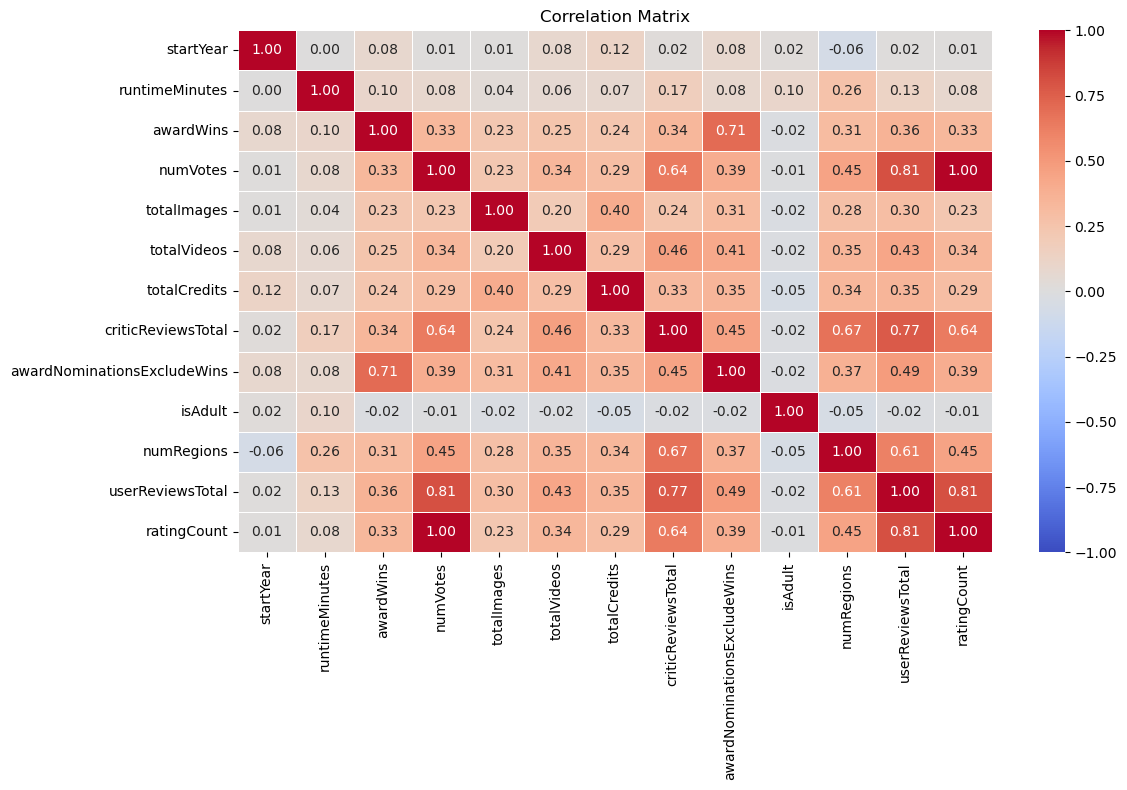

In [21]:
# Selezioniamo solo le colonne numeriche
df_numerical = df_trains.select_dtypes(include=['number'])

# Calcoliamo la matrice di correlazione
correlation_matrix = df_numerical.corr()

# Creiamo la heatmap della matrice di correlazione
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, 
            linewidths=0.5, vmin=-1, vmax=1)

# Titolo e visualizzazione
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [198]:
# 1. Convertire 'runtimeMinutes' e 'awardWins' in int
df_trains['runtimeMinutes'] = df_trains['runtimeMinutes'].astype(int)
df_trains['awardWins'] = df_trains['awardWins'].astype(int)

# 2. Convertire 'canHaveEpisodes' in int (da booleano a 1 o 0)
df_trains['canHaveEpisodes'] = df_trains['canHaveEpisodes'].astype(int)

# Verifica della conversione
print(df_trains.dtypes)

originalTitle                  object
rating                         object
startYear                       int64
runtimeMinutes                  int64
awardWins                       int64
numVotes                        int64
totalImages                     int64
totalVideos                     int64
totalCredits                    int64
criticReviewsTotal              int64
titleType                      object
awardNominationsExcludeWins     int64
canHaveEpisodes                 int64
isAdult                         int64
numRegions                      int64
userReviewsTotal                int64
ratingCount                     int64
countryOfOrigin                object
genres                         object
dtype: object


In [199]:
# Controllare la distribuzione di 'isAdult' e 'canHaveEpisodes'
print(df['isAdult'].value_counts())   # Mostra la frequenza di 0 (non adulti) e 1 (adulti)
print(df['canHaveEpisodes'].value_counts())  # Mostra la frequenza di 0 (senza episodi) e 1 (con episodi)


isAdult
0    16005
1      426
Name: count, dtype: int64
canHaveEpisodes
False    14832
True      1599
Name: count, dtype: int64


La variabile isAdult ha un forte sbilanciamento, con una grande maggioranza di record che appartengono alla categoria 0 (non adulti) e pochi record con 1 (adulti).
Il bilanciamento delle categorie potrebbe influenzare i risultati del clustering, specialmente con tecniche come il K-means, che possono essere sensibili alla distribuzione delle variabili.


<h2>PCA </h2>
(Non utilizzata ai fini del progetto)

In [201]:

# Creiamo una copia del dataframe df_trains
df_trains_copy = df_trains.copy()

# 1. Selezioniamo solo le variabili numeriche (quelle con tipo 'int64' o 'float64')
numeric_data = df_trains_copy.select_dtypes(include=[np.number])

# 2. Standardizzazione dei dati numerici
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_data)

# 3. Creiamo un dataframe con i dati standardizzati
df_scaled_dataframe = pd.DataFrame(df_scaled, columns=numeric_data.columns)
df_scaled_dataframe.head(5)

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount
0,0.120503,-0.055804,-0.189656,-0.030687,-0.139655,-0.125437,-0.328129,-0.120661,-0.152376,-0.327595,-0.163223,-0.437070,-0.146938,-0.030600
1,-0.377163,-0.055804,-0.189656,-0.074816,-0.139655,-0.125437,-0.497189,-0.193204,-0.152376,-0.327595,-0.163223,-0.437070,-0.146938,-0.074828
2,0.005657,-0.055804,-0.189656,-0.073265,-0.139655,-0.125437,-0.302770,-0.193204,-0.152376,-0.327595,-0.163223,-0.437070,-0.124438,-0.073277
3,1.115836,-0.055804,-0.189656,-0.074586,0.145747,-0.125437,-0.032274,-0.193204,-0.152376,3.052546,-0.163223,-0.437070,-0.146938,-0.074598
4,1.077554,0.555096,0.320318,0.827711,4.562681,0.970452,-0.108351,0.096967,0.141112,3.052546,-0.163223,4.916207,10.023075,0.828972


In [202]:
pca = PCA(n_components=10, random_state=42)

pca.fit_transform(df_scaled)

prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

PC_numbers = np.arange(pca.n_components_) + 1

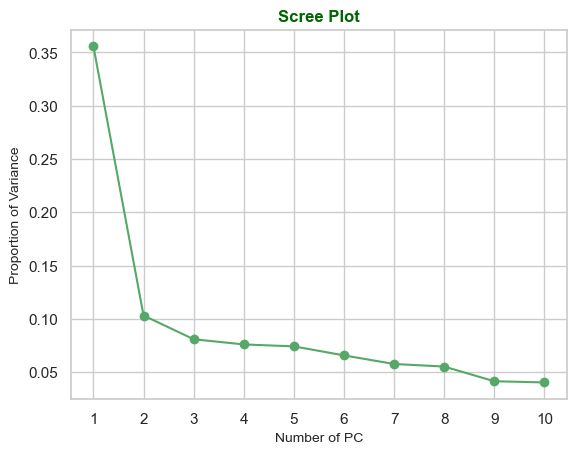

In [203]:

plt.plot(PC_numbers, prop_var,'go-')
plt.title('Scree Plot', fontsize=12, fontweight='bold', color = 'darkgreen')
plt.xlabel('Number of PC', fontsize=10)
plt.ylabel('Proportion of Variance', fontsize=10)
plt.xticks(PC_numbers)
plt.show()
     

In [204]:
pca = PCA(n_components=2, random_state=42)
PC = pca.fit_transform(df_scaled)
pca_continuous = pd.DataFrame(data = PC, columns = ['PC1', 'PC2'])

pca_continuous.head(5)

,PC1,PC2
0,-0.504074,-0.285007
1,-0.616264,-0.485643
2,-0.551023,-0.283760
3,-0.309011,1.881339
4,7.629351,0.930286


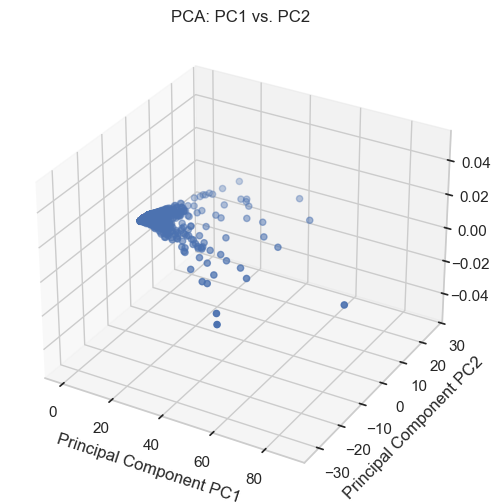

In [205]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_continuous['PC1'], pca_continuous['PC2'])
ax.set_xlabel('Principal Component PC1')
ax.set_ylabel('Principal Component PC2')


plt.title('PCA: PC1 vs. PC2')
plt.show()

In [206]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=numeric_data.columns, index=['PC1', 'PC2'])
loadings_df = loadings_df.round(2)
loadings_df.T

,PC1,PC2
startYear,0.03,0.35
runtimeMinutes,0.09,-0.07
awardWins,0.25,0.26
numVotes,0.37,-0.28
totalImages,0.20,0.35
totalVideos,0.25,0.13
totalCredits,0.23,0.38
criticReviewsTotal,0.37,-0.16
awardNominationsExcludeWins,0.30,0.29
canHaveEpisodes,0.03,0.47


<h3> Eliminazione e modifica di altre colonne </h3>

In [207]:
#eliminare numVotes
df_trains.drop('numVotes', axis=1, inplace=True)

In [208]:
#eliminare originalTitle 
df_trains.drop('originalTitle', axis=1, inplace=True)

In [209]:
import re

# Funzione per convertire i range in interi
def convert_range_to_integer(range_str):
    # Usa una regex per estrarre i numeri dal formato "(x, y]"
    numbers = re.findall(r"[\d.]+", range_str)
    # Il secondo numero (y) è il limite superiore, che corrisponde al valore del rating
    upper_limit = float(numbers[1])
    # Ritorna l'intero corrispondente al limite superiore
    return int(upper_limit)

# Applicare la funzione alla colonna 'rating'
df_trains['rating'] = df_trains['rating'].apply(convert_range_to_integer)

In [210]:
#convertire titleType
# Stampa tutti i valori unici (classi) nella colonna 'titleType'
print(df_trains['titleType'].unique())

['tvEpisode' 'videoGame' 'movie' 'tvSeries' 'video' 'tvMiniSeries' 'short'
 'tvMovie' 'tvSpecial' 'tvShort']


In [211]:
# Lista dei valori unici in 'titleType'
unique_title_types = ['tvEpisode', 'videoGame', 'movie', 'tvSeries', 'video', 'tvMiniSeries', 'short', 'tvMovie', 'tvSpecial', 'tvShort']

# Crea un dizionario di mappatura che assegna un numero a ciascun tipo
title_type_mapping = {title: i + 1 for i, title in enumerate(unique_title_types)}

# Sostituisci i valori di 'titleType' nel DataFrame con i numeri corrispondenti
df_trains['titleType'] = df_trains['titleType'].map(title_type_mapping)

# Verifica il risultato
print(df_trains['titleType'].head())

0    1
1    2
2    3
3    4
4    4
Name: titleType, dtype: int64


In [212]:
print(df_trains['titleType'].unique())

[ 1  2  3  4  5  6  7  8  9 10]


In [223]:
df_trains.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,16416.0,7.154910,1.386921,1.0,6.0,7.0,8.0,10.0
startYear,16416.0,1991.852217,26.122716,1878.0,1978.0,1997.0,2013.0,2024.0
runtimeMinutes,16416.0,60.009625,36.013531,0.0,40.0,58.0,80.0,600.0
awardWins,16416.0,0.371893,1.960944,0.0,0.0,0.0,0.0,50.0
totalImages,16416.0,11.275889,73.582696,0.0,1.0,1.0,6.0,3504.0
totalVideos,16416.0,0.228923,1.825058,0.0,0.0,0.0,0.0,91.0
totalCredits,16416.0,59.818043,118.304825,0.0,16.0,34.0,65.0,4973.0
criticReviewsTotal,16416.0,2.663316,13.785424,0.0,0.0,0.0,1.0,368.0
titleType,16416.0,3.577242,2.332883,1.0,1.0,3.0,5.0,10.0
awardNominationsExcludeWins,16416.0,0.519189,3.407397,0.0,0.0,0.0,0.0,124.0


In [226]:
df_trains.to_csv('df_train.csv', index=False)